# SBD MSG Location Plotter

In [59]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import cmocean

In [76]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8,4),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [77]:
df = pd.read_csv('300434063925210/message_position_2019.csv',
                 names=['time','lat','lon','quality'],
                 parse_dates=True,index_col='time')


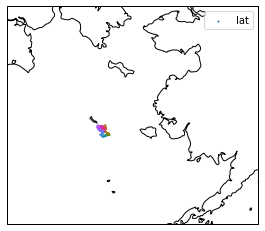

In [78]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

extent = [-180, -155, 55, 66]
fig,ax = make_map(projection=projection)

ax.scatter(df['lon'], df['lat'], s=1,
           c=df.index.dayofyear, cmap=cmocean.cm.phase,
           transform=transformation)

leg = ax.legend()

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

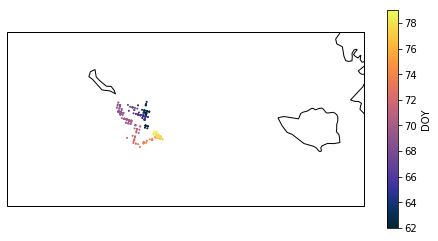

In [82]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

extent = [-175, -165, 59, 61]
fig,ax = make_map(projection=projection)

sm=ax.scatter(df['lon'], df['lat'], s=1,
           c=df.index.dayofyear, cmap=cmocean.cm.thermal,
           transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)
plt.colorbar(sm,ax=ax,label='DOY')